In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans

In [122]:
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [123]:
def denrdoOptimizer(data):
    sch.dendrogram(sch.linkage(data,method='ward'))
    plt.title('Dendogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')
    plt.show()

In [124]:
X = df[['MKT','PROFIT']].values

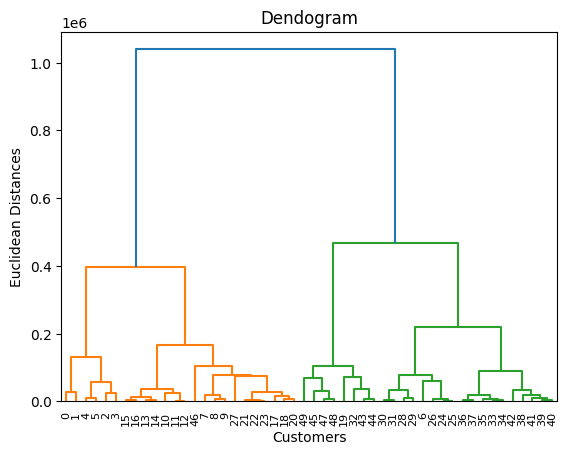

In [125]:
denrdoOptimizer(X)

In [126]:
def determineNoClusters(df):
    silh = []
    for i in range (2,11):
        model = AgglomerativeClustering(n_clusters=i)
        labels = model.fit_predict(df)
        score = silhouette_score(df,labels,metric="euclidean")
        silh.append(score)
    plt.bar(range(2,11),silh)

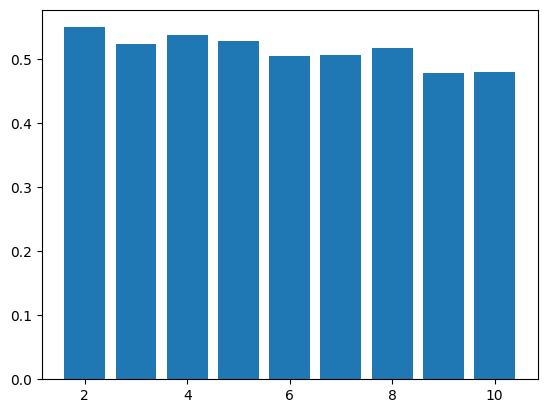

In [127]:
determineNoClusters(X)

In [128]:
def hierarchialTrainer(n,data):
    hc = AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')
    hc_labels = hc.fit_predict(data)
    return (hc,hc_labels)

In [129]:
hc, hc_labels = hierarchialTrainer(5,X)

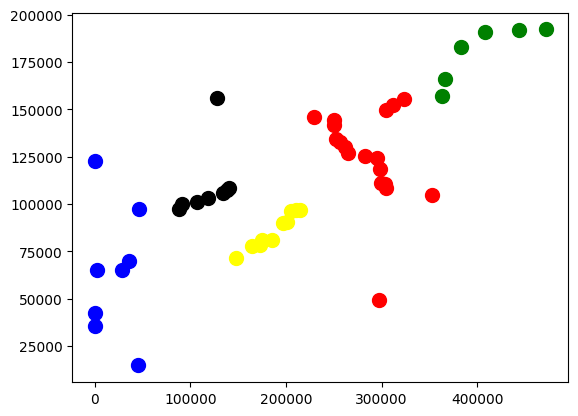

In [130]:
plt.scatter(X[hc_labels==0,0],X[hc_labels==0,1],s=100,color='red',label='Cluster 1')
plt.scatter(X[hc_labels==1,0],X[hc_labels==1,1],s=100,color='green',label='Cluster 2')
plt.scatter(X[hc_labels==2,0],X[hc_labels==2,1],s=100,color='blue',label='Cluster 3')
plt.scatter(X[hc_labels==3,0],X[hc_labels==3,1],s=100,color='yellow',label='Cluster 4')
plt.scatter(X[hc_labels==4,0],X[hc_labels==4,1],s=100,color='black',label='Cluster 5')
plt.show()